In [1]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.font_manager

In [21]:
from scipy import stats

In [20]:
df=pd.read_csv('Training_Clean.csv')
testing=pd.read_csv('Testeo_Clean.csv')

In [48]:
testing.head(2)

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Week,Day,Hour,Minute,Second
0,1478720107,59,30.47,44,312.67,3.37,6:28,17:45,45,9,9,35,7
1,1474063503,59,30.48,83,38.01,6.75,6:10,18:25,37,16,12,5,3


In [23]:
df

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Week,Day,Hour,Minute,Second
0,1475175023,634.99,61,30.46,41,14.96,6.75,6:13:00,18:13:00,39,29,8,50,23
1,1481799902,1.27,37,30.26,70,207.43,5.62,6:50:00,17:46:00,50,15,1,5,2
2,1478339417,1.21,47,30.49,33,168.20,5.62,6:25:00,17:47:00,44,4,23,50,17
3,1472887208,1.67,54,30.46,101,152.60,3.37,6:07:00,18:37:00,35,2,21,20,8
4,1478724901,839.78,62,30.47,36,291.95,7.87,6:28:00,17:45:00,45,9,10,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24506,1481676309,216.29,50,30.28,96,304.22,12.37,6:48:00,17:45:00,50,13,14,45,9
24507,1473426025,1.47,44,30.37,100,162.80,3.37,6:09:00,18:31:00,36,9,3,0,25
24508,1474966519,1.20,48,30.42,64,158.90,4.50,6:12:00,18:15:00,39,26,22,55,19
24509,1475451021,659.12,56,30.42,99,55.72,13.50,6:14:00,18:10:00,39,2,13,30,21


In [26]:
a=df[np.abs(df.Radiation-df.Radiation.mean()) <= (3*df.Radiation.std())]

In [27]:
a

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Week,Day,Hour,Minute,Second
0,1475175023,634.99,61,30.46,41,14.96,6.75,6:13:00,18:13:00,39,29,8,50,23
1,1481799902,1.27,37,30.26,70,207.43,5.62,6:50:00,17:46:00,50,15,1,5,2
2,1478339417,1.21,47,30.49,33,168.20,5.62,6:25:00,17:47:00,44,4,23,50,17
3,1472887208,1.67,54,30.46,101,152.60,3.37,6:07:00,18:37:00,35,2,21,20,8
4,1478724901,839.78,62,30.47,36,291.95,7.87,6:28:00,17:45:00,45,9,10,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24506,1481676309,216.29,50,30.28,96,304.22,12.37,6:48:00,17:45:00,50,13,14,45,9
24507,1473426025,1.47,44,30.37,100,162.80,3.37,6:09:00,18:31:00,36,9,3,0,25
24508,1474966519,1.20,48,30.42,64,158.90,4.50,6:12:00,18:15:00,39,26,22,55,19
24509,1475451021,659.12,56,30.42,99,55.72,13.50,6:14:00,18:10:00,39,2,13,30,21


In [31]:
df=a[np.abs(a.Temperature-a.Temperature.mean()) <= (3*a.Temperature.std())]

In [36]:
df=df[np.abs(df.Pressure-df.Pressure.mean()) <= (3*df.Pressure.std())]

In [38]:
df=df[np.abs(df.Humidity-df.Humidity.mean()) <= (3*df.Humidity.std())]

In [41]:
df=df[np.abs(df['WindDirection(Degrees)']-df['WindDirection(Degrees)'].mean()) <= (3*df['WindDirection(Degrees)'].std())]

In [43]:
df=df[np.abs(df.Speed-df.Speed.mean()) <= (3*df.Speed.std())]

In [ ]:
#prueba 1 corriendo todas las columnas sin outliers

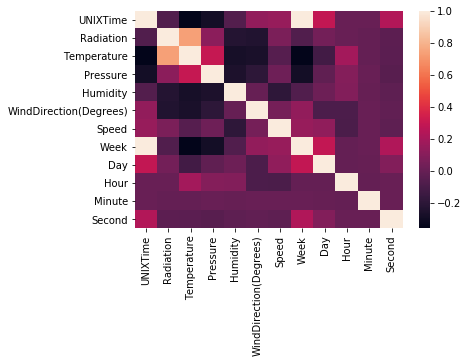

In [45]:
sns.heatmap(df.corr())

In [71]:
df.drop(columns=['TimeSunRise','TimeSunSet'],inplace=True)

C:\Users\danie\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
testing

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Week,Day,Hour,Minute,Second
0,1478720107,59,30.47,44,312.67,3.37,45,9,9,35,7
1,1474063503,59,30.48,83,38.01,6.75,37,16,12,5,3
2,1476109221,47,30.39,78,213.62,5.62,41,10,4,20,21
3,1481475056,45,30.40,98,176.63,4.50,49,11,6,50,56
4,1477493117,45,30.40,34,175.89,6.75,43,26,4,45,17
...,...,...,...,...,...,...,...,...,...,...,...
8167,1477777520,51,30.42,101,336.56,5.62,43,29,11,45,20
8168,1481286949,45,30.36,70,204.75,4.50,49,9,2,35,49
8169,1476376223,49,30.46,43,155.70,12.37,41,13,6,30,23
8170,1480320620,47,30.47,39,156.22,12.37,47,27,22,10,20


In [72]:
df

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Week,Day,Hour,Minute,Second
0,1475175023,634.99,61,30.46,41,14.96,6.75,39,29,8,50,23
1,1481799902,1.27,37,30.26,70,207.43,5.62,50,15,1,5,2
2,1478339417,1.21,47,30.49,33,168.20,5.62,44,4,23,50,17
3,1472887208,1.67,54,30.46,101,152.60,3.37,35,2,21,20,8
4,1478724901,839.78,62,30.47,36,291.95,7.87,45,9,10,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24506,1481676309,216.29,50,30.28,96,304.22,12.37,50,13,14,45,9
24507,1473426025,1.47,44,30.37,100,162.80,3.37,36,9,3,0,25
24508,1474966519,1.20,48,30.42,64,158.90,4.50,39,26,22,55,19
24509,1475451021,659.12,56,30.42,99,55.72,13.50,39,2,13,30,21


In [74]:
df.to_csv('Trainnoout.csv')

In [75]:
testing.to_csv('Testnoout.csv')

In [47]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.7+8-LTS, mixed mode)
  Starting server from C:\Users\danie\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmp323suk3t
  JVM stdout: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmp323suk3t\h2o_danie_started_from_python.out
  JVM stderr: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmp323suk3t\h2o_danie_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,13 secs
H2O_cluster_timezone:,America/Mexico_City
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,"7 days, 12 hours and 1 minute"
H2O_cluster_name:,H2O_from_python_danie_8633v9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.971 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [174]:
training['TimeSunRise']=pd.to_datetime(training['TimeSunRise'])
training['TimeSunSet']=pd.to_datetime(training['TimeSunSet'])

In [175]:
testing['TimeSunSet']=pd.to_datetime(testing['TimeSunSet'])
testing['TimeSunRise']=pd.to_datetime(testing['TimeSunRise'])

In [176]:
training['TimeSunRiseHH']=training['TimeSunRise'].dt.hour
training['TimeSunRiseMM']=training['TimeSunRise'].dt.minute
training['TimeSunSetHH']=training['TimeSunSet'].dt.hour
training['TimeSunSetMM']=training['TimeSunSet'].dt.minute

In [177]:
testing['TimeSunRiseHH']=testing['TimeSunRise'].dt.hour
testing['TimeSunRiseMM']=testing['TimeSunRise'].dt.minute
testing['TimeSunSetHH']=testing['TimeSunSet'].dt.hour
testing['TimeSunSetMM']=testing['TimeSunSet'].dt.minute

In [178]:
testing.drop(columns=['TimeSunRise'],inplace=True)
training.drop(columns=['TimeSunRise'],inplace=True)

In [179]:
testing.drop(columns=['TimeSunSet'],inplace=True)
training.drop(columns=['TimeSunSet'],inplace=True)

In [180]:
training.drop(columns=['TimeSunRiseHH'],inplace=True)

In [181]:
testing.drop(columns=['TimeSunRiseHH'],inplace=True)

In [182]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24511 entries, 0 to 24510
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                24511 non-null  int64  
 1   Radiation               24511 non-null  float64
 2   Temperature             24511 non-null  int64  
 3   Pressure                24511 non-null  float64
 4   Humidity                24511 non-null  int64  
 5   WindDirection(Degrees)  24511 non-null  float64
 6   Speed                   24511 non-null  float64
 7   Week                    24511 non-null  int64  
 8   Day                     24511 non-null  int64  
 9   Hour                    24511 non-null  int64  
 10  Minute                  24511 non-null  int64  
 11  Second                  24511 non-null  int64  
 12  TimeSunRiseMM           24511 non-null  int64  
 13  TimeSunSetHH            24511 non-null  int64  
 14  TimeSunSetMM            24511 non-null

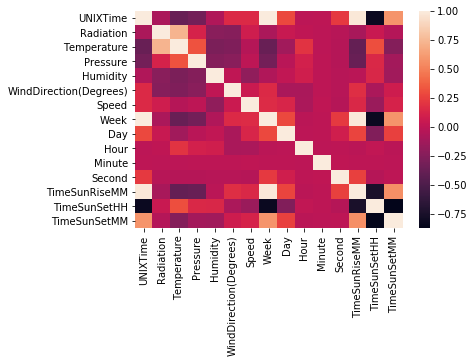

In [190]:
sns.heatmap(training.corr())

In [202]:
training.drop(columns=['WindDirection(Degrees)'],inplace=True)

In [205]:
testing.drop(columns=['WindDirection(Degrees)'],inplace=True)

In [76]:
train=h2o.import_file('Trainnoout.csv')
test=h2o.import_file('Testnoout.csv')

X=train.columns
y='Radiation'
X.remove(y)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
aml=H2OAutoML(max_models=11, seed=1)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |
13:34:58.618: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████

In [51]:
lb=aml.leaderboard

lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200506_131140,5575.09,74.6666,5575.09,32.7432,nan
StackedEnsemble_BestOfFamily_AutoML_20200506_131140,5611.72,74.9114,5611.72,33.095,nan
GBM_4_AutoML_20200506_131140,5835.39,76.3897,5835.39,34.0621,nan
DRF_1_AutoML_20200506_131140,5896.02,76.7855,5896.02,33.5743,0.579547
GBM_3_AutoML_20200506_131140,5903.88,76.8367,5903.88,34.5101,nan
GBM_2_AutoML_20200506_131140,5955.75,77.1735,5955.75,35.5646,nan
XRT_1_AutoML_20200506_131140,5962.64,77.2181,5962.64,34.4227,0.608479
GBM_1_AutoML_20200506_131140,6152.97,78.4409,6152.97,37.1402,nan
GBM_5_AutoML_20200506_131140,6228.26,78.9193,6228.26,38.183,nan
GBM_grid__1_AutoML_20200506_131140_model_1,6792.8,82.4184,6792.8,41.9976,nan


In [52]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200506_131140

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1668.0402928087112
RMSE: 40.841648997178254
MAE: 18.455887890125428
RMSLE: NaN
R^2: 0.9828308823518268
Mean Residual Deviance: 1668.0402928087112
Null degrees of freedom: 23877
Residual degrees of freedom: 23872
Null deviance: 2319831859.031167
Residual deviance: 39829466.11168641
AIC: 244937.3749492556

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 5575.094672286424
RMSE: 74.6665565851702
MAE: 32.74319572517097
RMSLE: NaN
R^2: 0.9426156210129595
Mean Residual Deviance: 5575.094672286424
Null degrees of freedom: 23877
Residual degrees of freedom: 23872
Null deviance: 2319938532.0391
Residual deviance: 133122110.58485523
AIC: 273749.9985794798


In [54]:
testing.drop(columns=['TimeSunRise'],inplace=True)
testing.drop(columns=['TimeSunSet'],inplace=True)

In [59]:
testing.drop(columns=['TimeSunSet'],inplace=True)

In [60]:
testing.to_csv('testeo_clean.csv')

In [61]:
testing

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Week,Day,Hour,Minute,Second
0,1478720107,59,30.47,44,312.67,3.37,45,9,9,35,7
1,1474063503,59,30.48,83,38.01,6.75,37,16,12,5,3
2,1476109221,47,30.39,78,213.62,5.62,41,10,4,20,21
3,1481475056,45,30.40,98,176.63,4.50,49,11,6,50,56
4,1477493117,45,30.40,34,175.89,6.75,43,26,4,45,17
...,...,...,...,...,...,...,...,...,...,...,...
8167,1477777520,51,30.42,101,336.56,5.62,43,29,11,45,20
8168,1481286949,45,30.36,70,204.75,4.50,49,9,2,35,49
8169,1476376223,49,30.46,43,155.70,12.37,41,13,6,30,23
8170,1480320620,47,30.47,39,156.22,12.37,47,27,22,10,20


In [62]:
test=h2o.import_file('testeo_Clean.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [63]:
pred=aml.leader.predict(test)

pred.shape

stackedensemble prediction progress: |████████████████████████████████████| 100%


C:\Users\danie\anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset is missing column 'TimeSunRise': substituting in a column of NaN
  warnings.warn(w)
C:\Users\danie\anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset is missing column 'TimeSunSet': substituting in a column of NaN
  warnings.warn(w)


(8172, 1)

In [64]:
pred_df=h2o.as_list(pred)

In [65]:
pred_df.insert(0,'ID',pred_df.index)

In [66]:
pred_df.rename(columns={'predict':'Radiation','ID':'id'},inplace=True)

In [67]:
pred_df.to_csv('submit11.csv')